# $11^{th}$ excercise

In [110]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

In [111]:
ntrain=20000
sigma=0.5
batch_size=32
epochs=30

a=3
b=-2
c=-3
d=4
def f(x):
    return a*x**3+b*x**2+c*x+d

In [112]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
y_train = np.random.normal(f(x_train), sigma) 

x_valid = np.random.uniform(-1, 1, ntrain // 10)
y_valid = np.random.normal(f(x_valid), sigma)

x_target = np.linspace(-1.5,1.5,300)
y_target = f(x_target)

In [113]:
def create_model(neurons_per_layer,act_function):
    model = tf.keras.Sequential()
    model.add(Dense(neurons_per_layer[0], input_shape=(1,), activation=act_function))
    for neurons in neurons_per_layer[1:]:
        model.add(Dense(neurons, activation=act_function))
    model.add(Dense(1,))

    return model

def compile_model(neurons_per_layer,act_function,loss_function,opt_function):
    np.random.seed(0)
    tf.random.set_seed(0)
    # create the model
    model=create_model(neurons_per_layer,act_function)
    # compile the model
    model.compile(loss=loss_function,
                  optimizer=opt_function)

    return model

def test_model(model):
    score = model.evaluate(x_train, y_train, batch_size=32, verbose=0)  
    print("Loss: training data ->", score)
    
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)  
    print("Loss: validation data -> ", score)
    
    core = model.evaluate(x_target, y_target, batch_size=32, verbose=0)  
    print("Loss: target function -> ", score)

In [114]:
def show_results(model, history):
    plt.figure(figsize=(16,8))
    
    plt.subplot(121)
    plt.plot(history.history["loss"], label="Training")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.grid(True)

    
    plt.subplot(122)
    x_predict = np.random.uniform(-1.5, 1.5, 500)
    y_predict = model.predict(x_predict)
    plt.scatter(x_train, y_train, label='Training')
    plt.scatter(x_predict, y_predict, label='Predicted')
    plt.plot(x_target, y_target, label='Target',c='black')   
    plt.grid(True)
    plt.legend()

    
    plt.show()


We start by seeking which combination of layers and neurons is better suited for our pourpose. In order to do this we choose some standard activation and loss function and optimizer: Relu, mean square error and stochastic gradient descent.

Layers:  1
Neurons:  5
Loss: training data -> 0.2742602527141571
Loss: validation data ->  0.26226377487182617
Loss: target function ->  0.26226377487182617
16/16 [==============================] - 0s 2ms/step


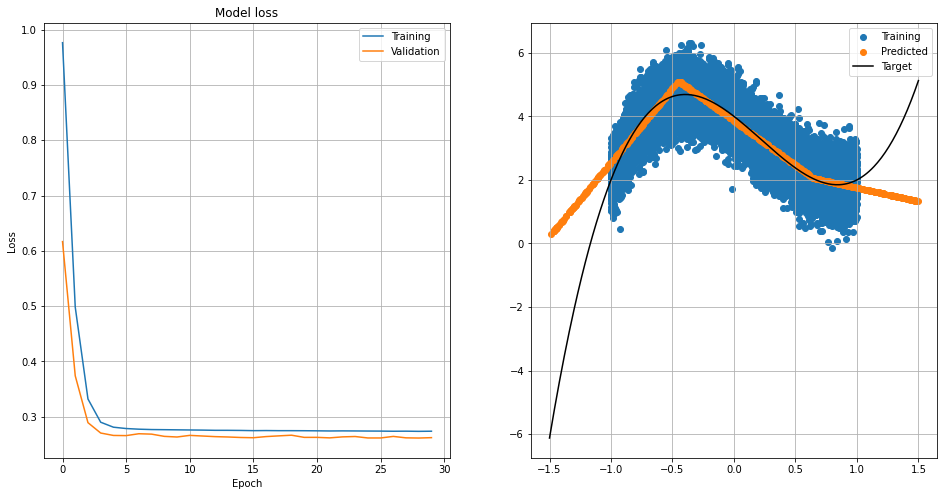

Layers:  1
Neurons:  25
Loss: training data -> 0.2594129741191864
Loss: validation data ->  0.2536790370941162
Loss: target function ->  0.2536790370941162
16/16 [==============================] - 0s 3ms/step


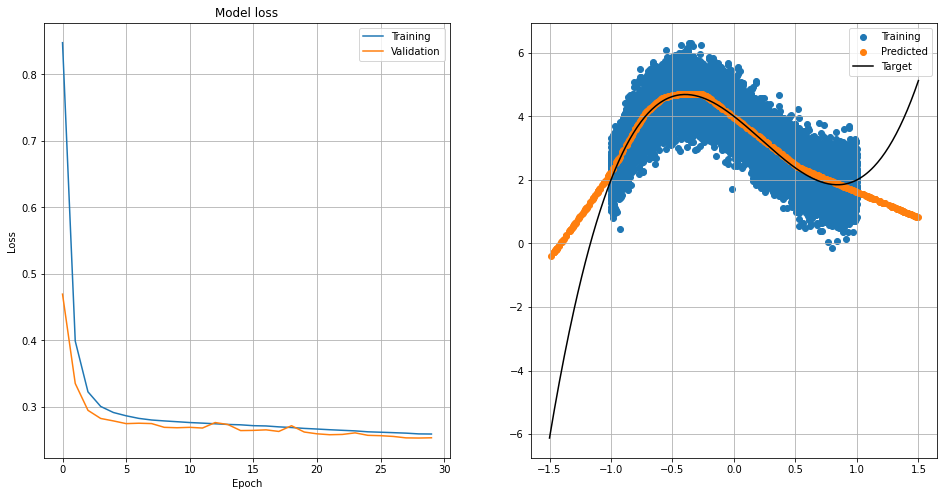

Layers:  1
Neurons:  45
Loss: training data -> 0.2576099634170532
Loss: validation data ->  0.25226104259490967
Loss: target function ->  0.25226104259490967
16/16 [==============================] - 0s 2ms/step


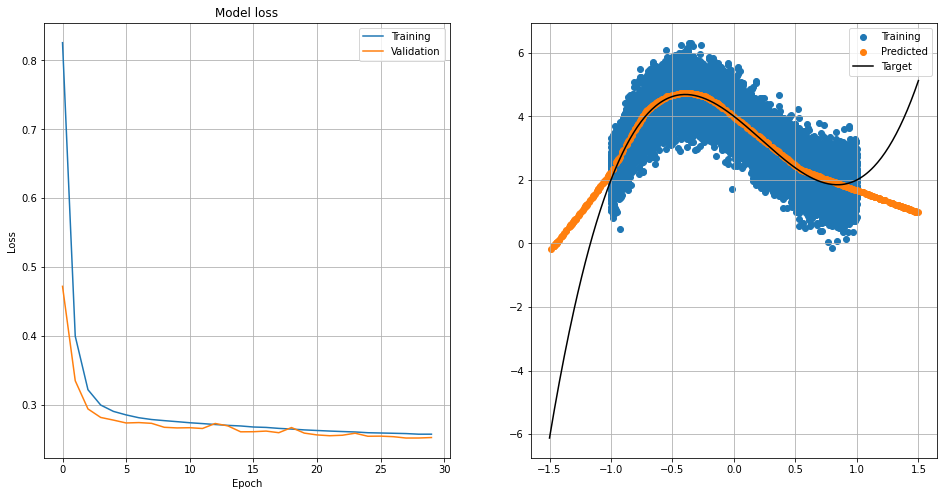

-------------------
Layers:  2
Neurons:  5
Loss: training data -> 0.28311648964881897
Loss: validation data ->  0.27410179376602173
Loss: target function ->  0.27410179376602173
16/16 [==============================] - 0s 2ms/step


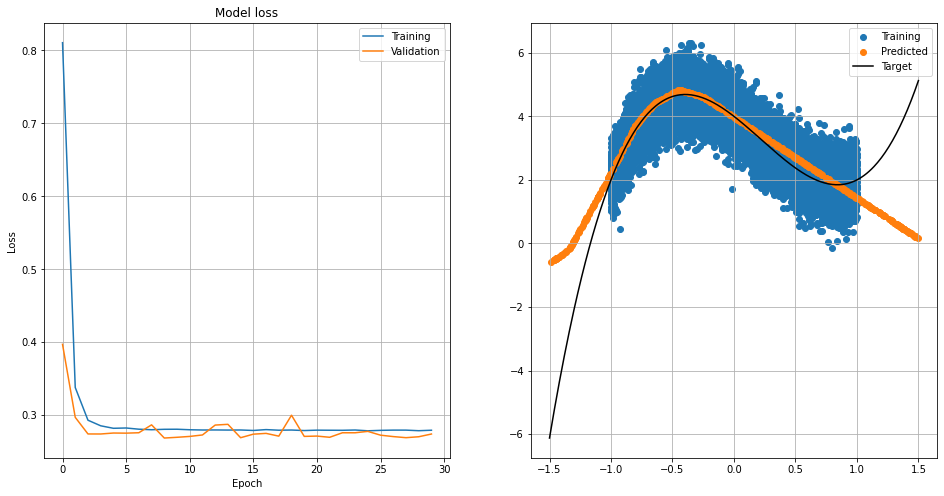

Layers:  2
Neurons:  25
Loss: training data -> 0.2582428753376007
Loss: validation data ->  0.2547587454319
Loss: target function ->  0.2547587454319
16/16 [==============================] - 0s 4ms/step


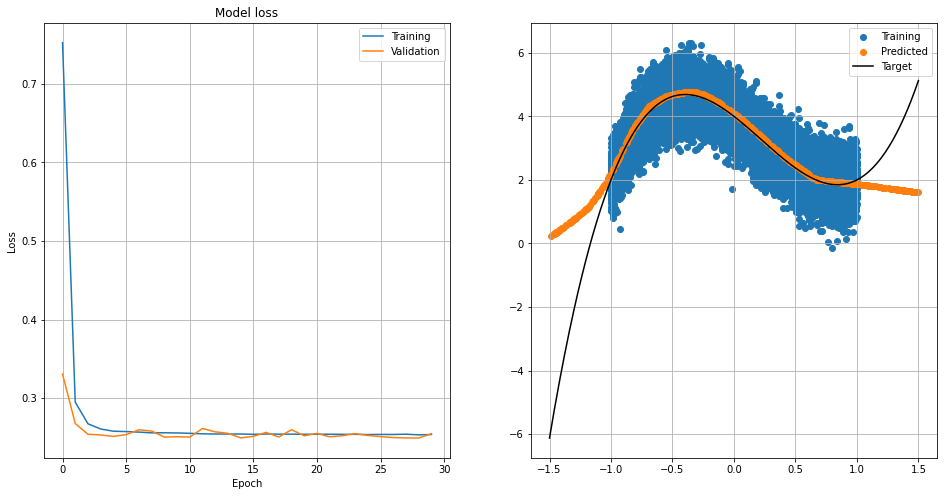

Layers:  2
Neurons:  45
Loss: training data -> 0.25973883271217346
Loss: validation data ->  0.25611308217048645
Loss: target function ->  0.25611308217048645
16/16 [==============================] - 0s 2ms/step


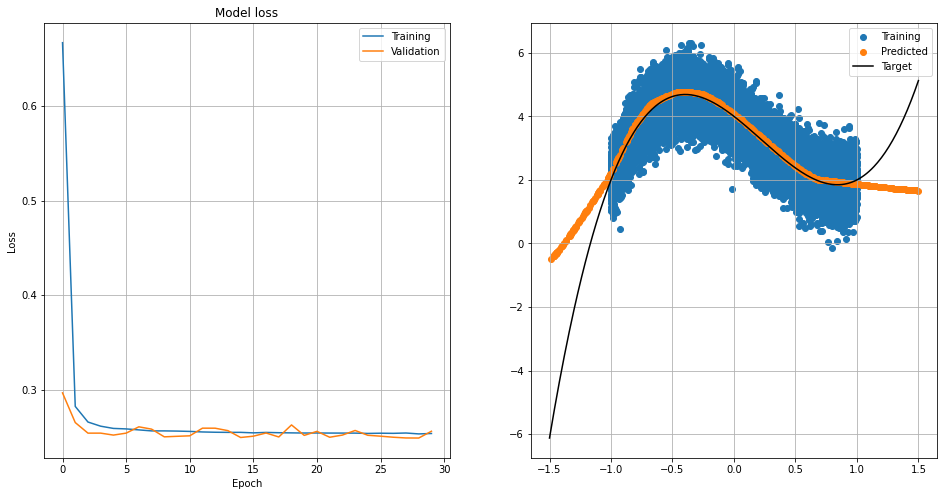

-------------------
Layers:  3
Neurons:  5
Loss: training data -> 0.26574307680130005
Loss: validation data ->  0.2607102692127228
Loss: target function ->  0.2607102692127228
16/16 [==============================] - 0s 3ms/step


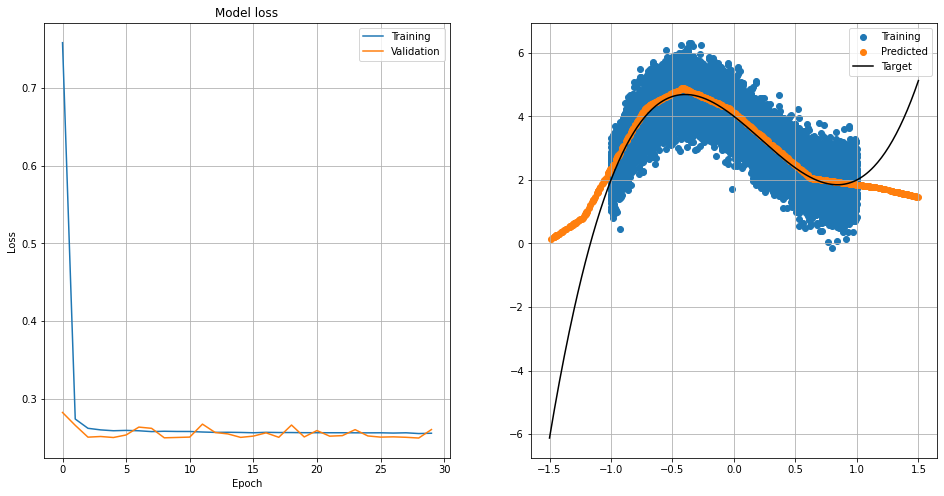

Layers:  3
Neurons:  25
Loss: training data -> 0.2599886357784271
Loss: validation data ->  0.2561852037906647
Loss: target function ->  0.2561852037906647
16/16 [==============================] - 0s 3ms/step


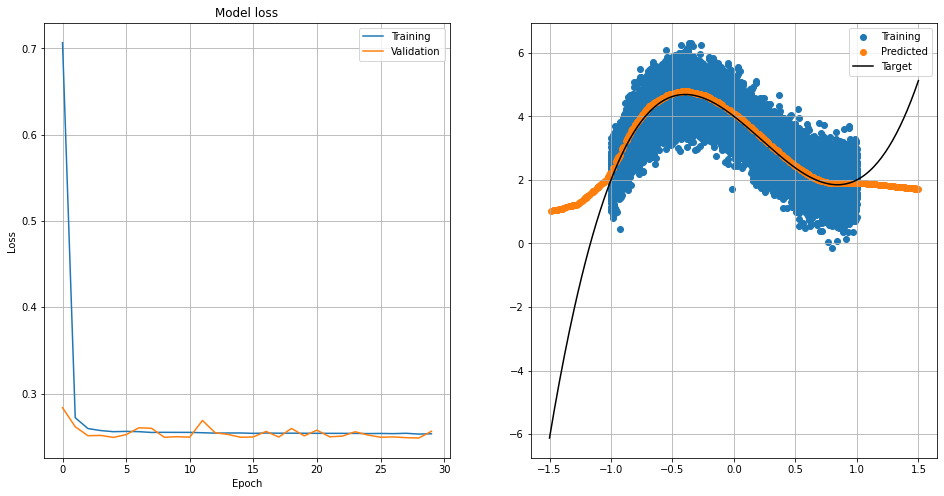

Layers:  3
Neurons:  45
Loss: training data -> 0.25944462418556213
Loss: validation data ->  0.25654444098472595
Loss: target function ->  0.25654444098472595
16/16 [==============================] - 0s 2ms/step


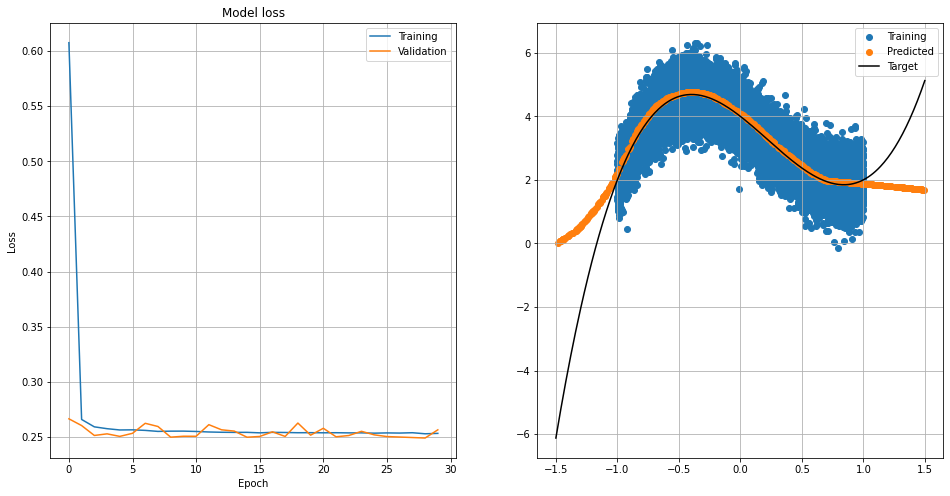

-------------------


In [115]:
for nlayers in [1,2,3]:
    for nneurons in [5,25,45]:
        print("Layers: ", nlayers)
        print("Neurons: ", nneurons)
        
        model=compile_model(np.ones(nlayers)*nneurons,'relu','mse','sgd')
        history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  shuffle=True,
                  validation_data=(x_valid, y_valid))
        test_model(model)
        show_results(model,history)
    print("-------------------")


We can immediatly notice that increasing the number of layers and keepeng a low number of neurons is worse than increasing the number of neurons with just one layer. Moreover we notice how increasing the numbers of neurons and layers does not always results in a better model. 

One last observation: the fact that for a low number of neurons the prediction is a polygonal curve can be explained by the fact that the Relu activation function has the same behaviour, for arguments greater than zero, of the default neuron which is linear.

We decided to proceed with one layer of 45 neurons and start to try different activation functions

Activation function:  elu
Loss: training data -> 0.29196879267692566
Loss: validation data ->  0.28380271792411804
Loss: target function ->  0.28380271792411804
16/16 [==============================] - 0s 2ms/step


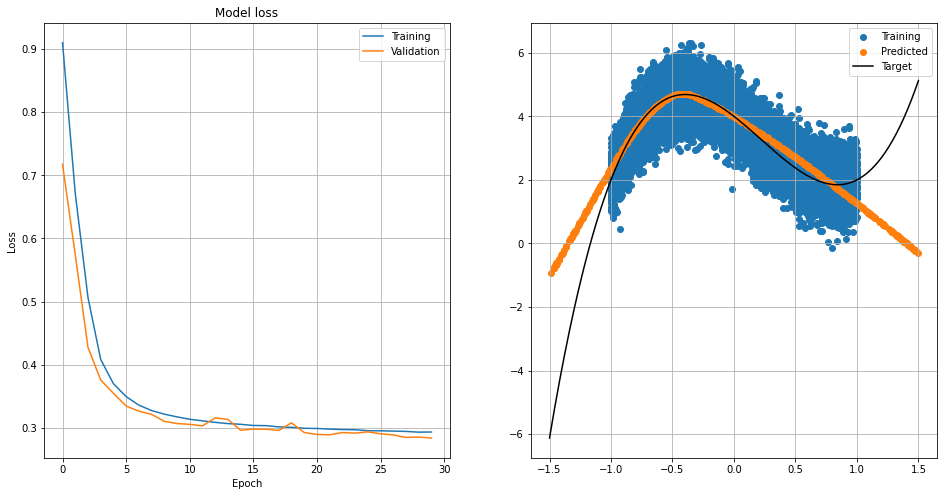

-------------------
Activation function:  softplus
Loss: training data -> 0.2847420573234558
Loss: validation data ->  0.2747154235839844
Loss: target function ->  0.2747154235839844
16/16 [==============================] - 0s 2ms/step


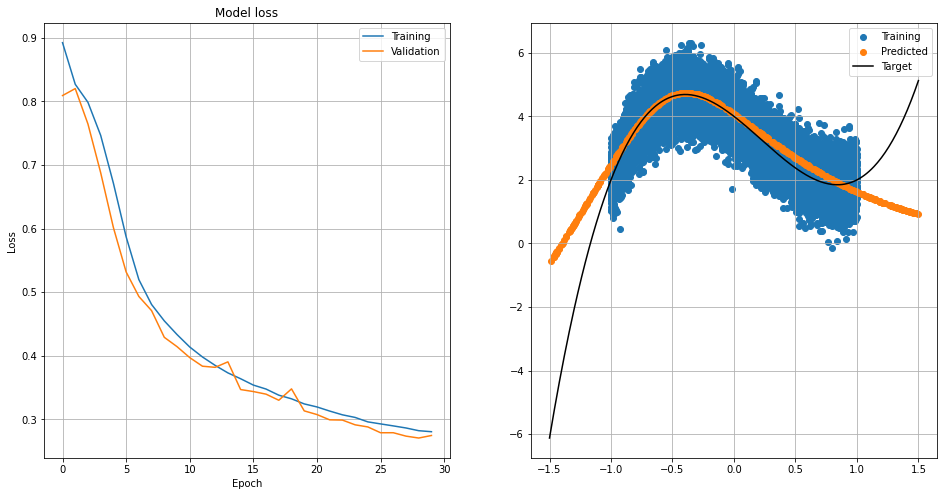

-------------------
Activation function:  sigmoid
Loss: training data -> 0.3485299348831177
Loss: validation data ->  0.3413081169128418
Loss: target function ->  0.3413081169128418
16/16 [==============================] - 0s 2ms/step


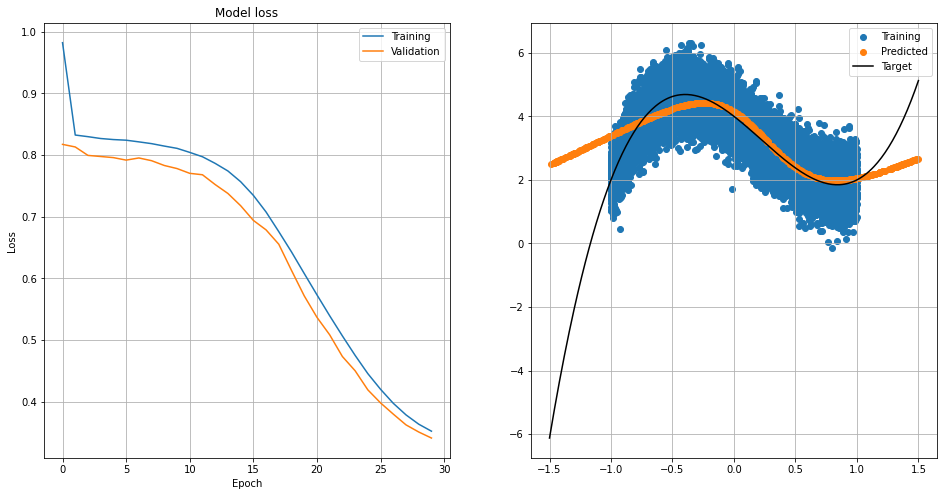

-------------------
Activation function:  tanh
Loss: training data -> 0.2555904686450958
Loss: validation data ->  0.2497895061969757
Loss: target function ->  0.2497895061969757
16/16 [==============================] - 0s 2ms/step


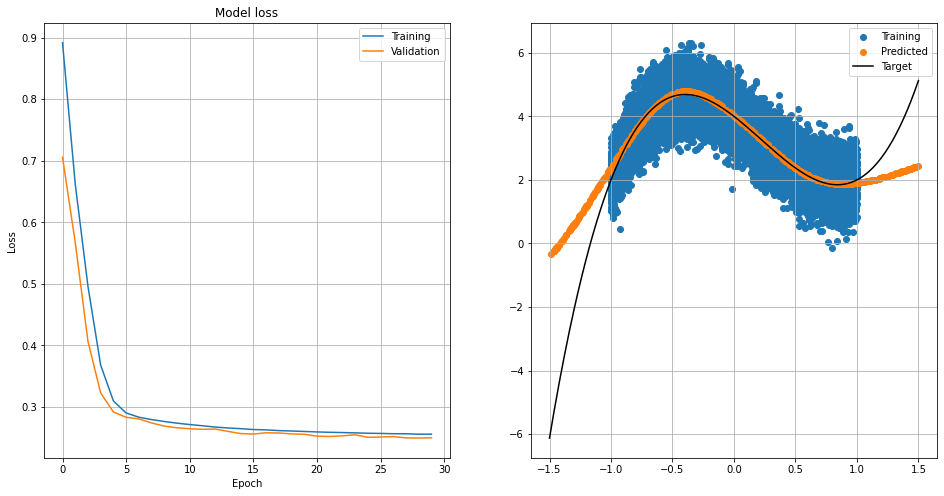

-------------------


In [116]:
for actfun in ['elu','softplus','sigmoid','tanh']:
    print("Activation function: ", actfun)
        
    model=compile_model([45],actfun,'mse','sgd')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,
              validation_data=(x_valid, y_valid))
    test_model(model)
    show_results(model,history)
    print("-------------------")


We used two functions with open bounds and two with plateau. Overall, tanh seems to be the better one, reproducing at least the sign of the slope outside the training interval. We try to run again the test on neurons and layers to see if some new information emerges.

Layers:  1
Neurons:  5
Loss: training data -> 0.25279828906059265
Loss: validation data ->  0.2501686215400696
Loss: target function ->  0.2501686215400696
16/16 [==============================] - 0s 2ms/step


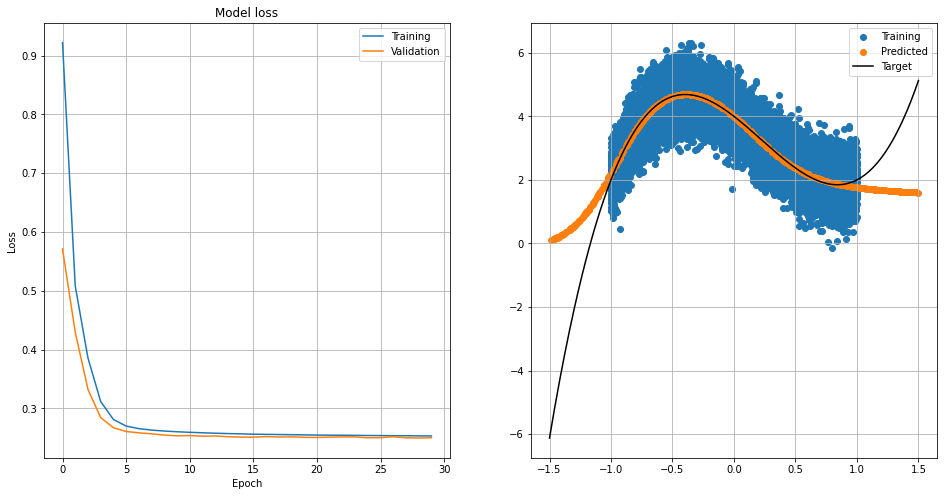

-------------------
Layers:  1
Neurons:  25
Loss: training data -> 0.2545399069786072
Loss: validation data ->  0.24931512773036957
Loss: target function ->  0.24931512773036957
16/16 [==============================] - 0s 2ms/step


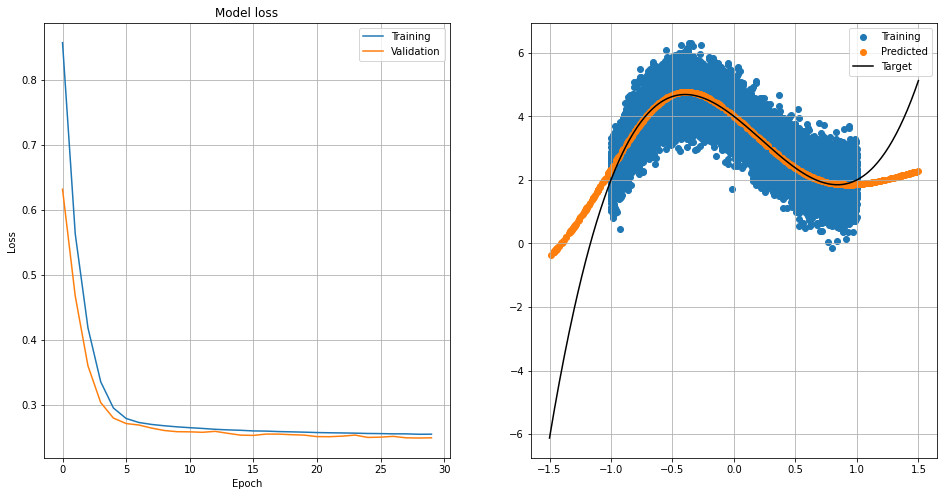

-------------------
Layers:  1
Neurons:  45
Loss: training data -> 0.2555904686450958
Loss: validation data ->  0.2497895061969757
Loss: target function ->  0.2497895061969757
16/16 [==============================] - 0s 2ms/step


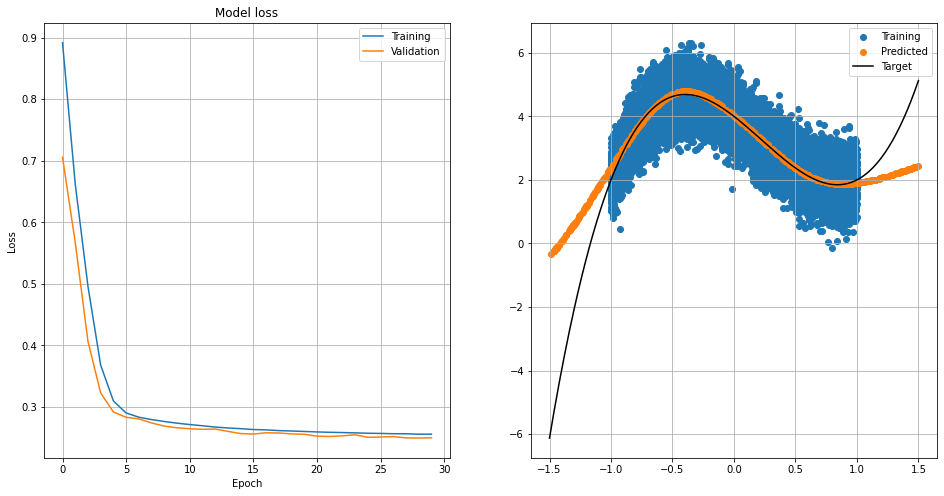

-------------------
Layers:  2
Neurons:  5
Loss: training data -> 0.2522619664669037
Loss: validation data ->  0.2514859139919281
Loss: target function ->  0.2514859139919281
16/16 [==============================] - 0s 2ms/step


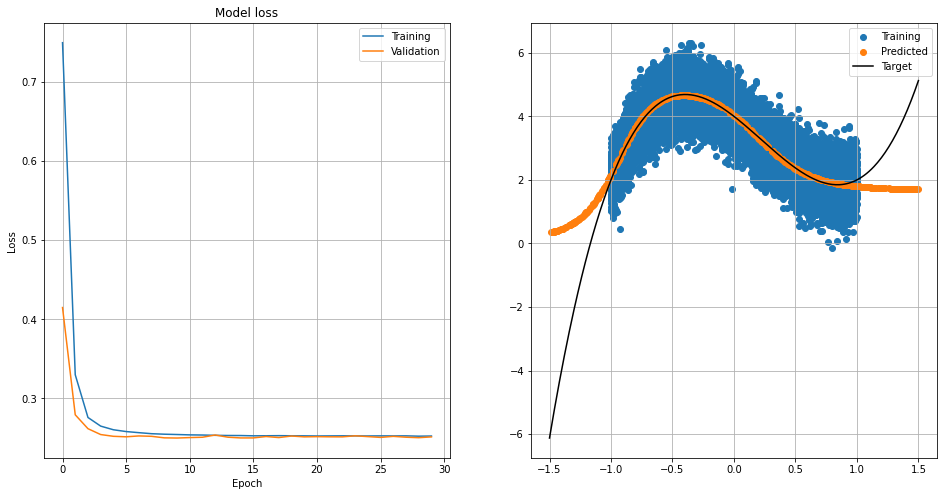

-------------------
Layers:  2
Neurons:  25
Loss: training data -> 0.25344476103782654
Loss: validation data ->  0.25128841400146484
Loss: target function ->  0.25128841400146484
16/16 [==============================] - 0s 2ms/step


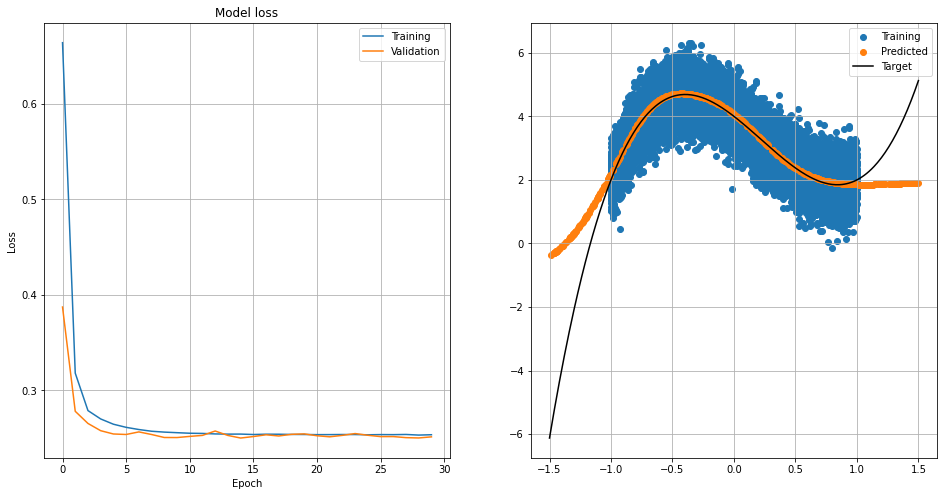

-------------------
Layers:  2
Neurons:  45
Loss: training data -> 0.25528398156166077
Loss: validation data ->  0.25187525153160095
Loss: target function ->  0.25187525153160095
16/16 [==============================] - 0s 2ms/step


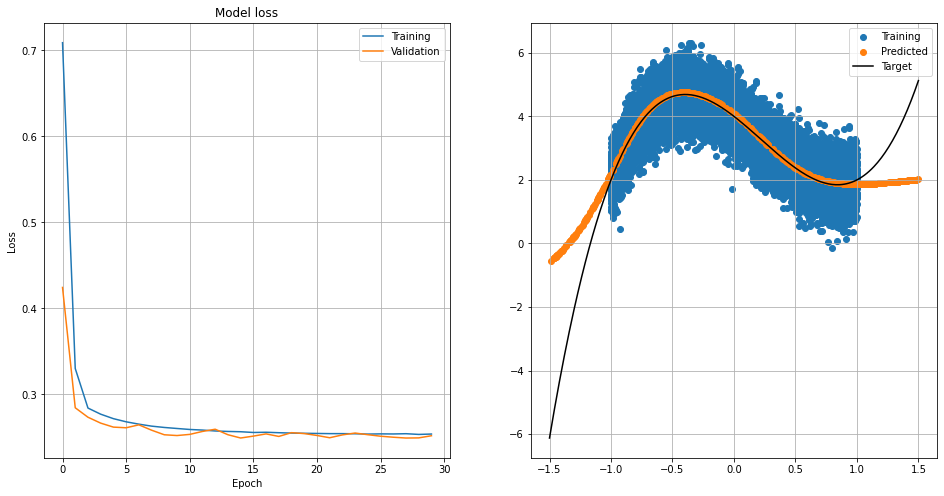

-------------------
Layers:  3
Neurons:  5
Loss: training data -> 0.2541881203651428
Loss: validation data ->  0.2534678280353546
Loss: target function ->  0.2534678280353546
16/16 [==============================] - 0s 3ms/step


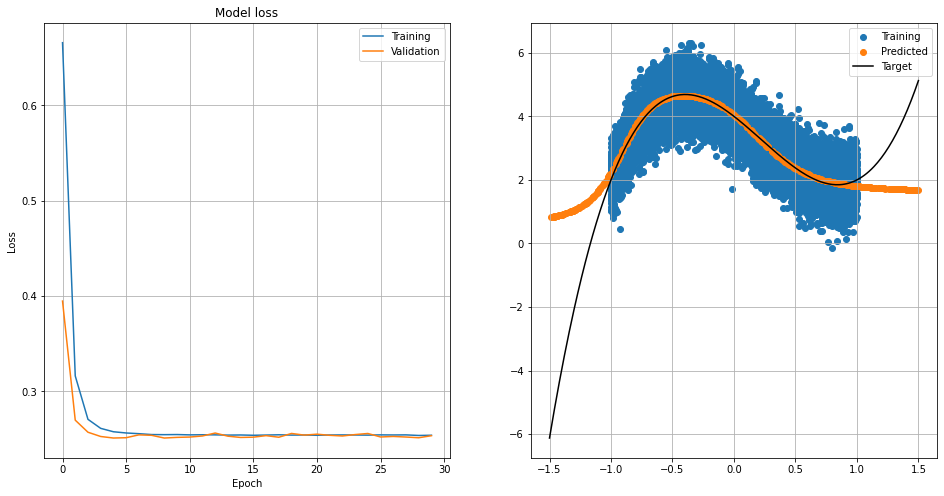

-------------------
Layers:  3
Neurons:  25
Loss: training data -> 0.2557295560836792
Loss: validation data ->  0.253486692905426
Loss: target function ->  0.253486692905426
16/16 [==============================] - 0s 4ms/step


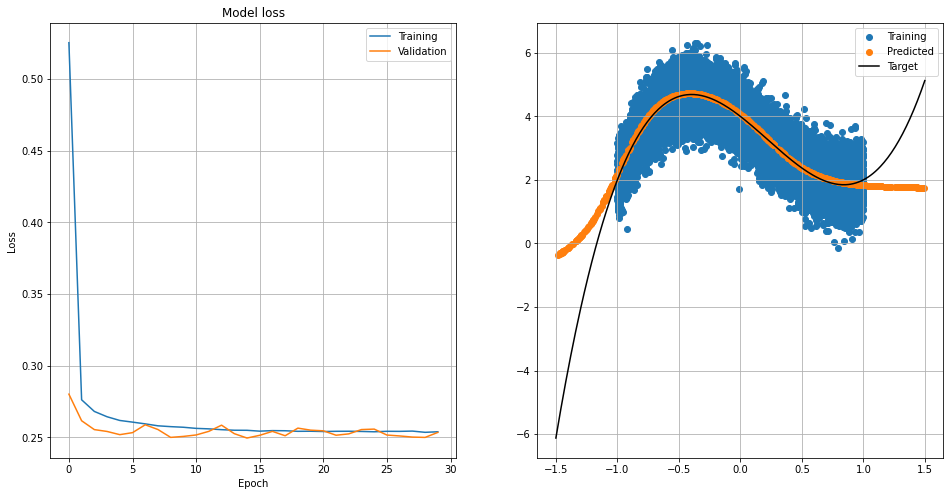

-------------------
Layers:  3
Neurons:  45
Loss: training data -> 0.2586882710456848
Loss: validation data ->  0.25533804297447205
Loss: target function ->  0.25533804297447205
16/16 [==============================] - 0s 2ms/step


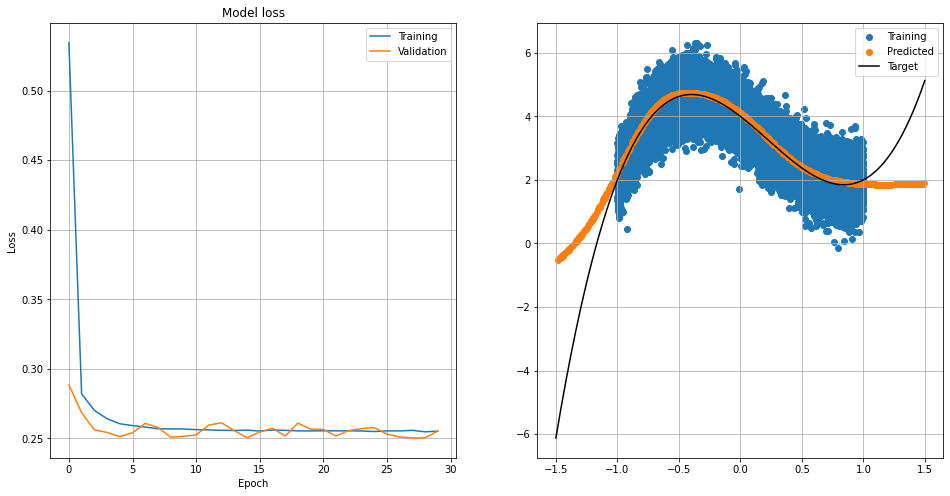

-------------------


In [117]:
for nlayers in [1,2,3]:
    for nneurons in [5,25,45]:
        print("Layers: ", nlayers)
        print("Neurons: ", nneurons)
        
        model=compile_model(np.ones(nlayers)*nneurons,'tanh','mse','sgd')
        history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  shuffle=True,
                  validation_data=(x_valid, y_valid))
        test_model(model)
        show_results(model,history)
        print("-------------------")


At least those results seems to confirm our hypotesis about the linear behaviour for fit with a low number of neurons. INCREMENTO LAYER E NON NEURONI PEGGIO????

Let's now try some loss function to optimize

Loss function:  mean_squared_logarithmic_error
Loss: training data -> 0.03881344571709633
Loss: validation data ->  0.036583803594112396
16/16 [==============================] - 0s 3ms/step


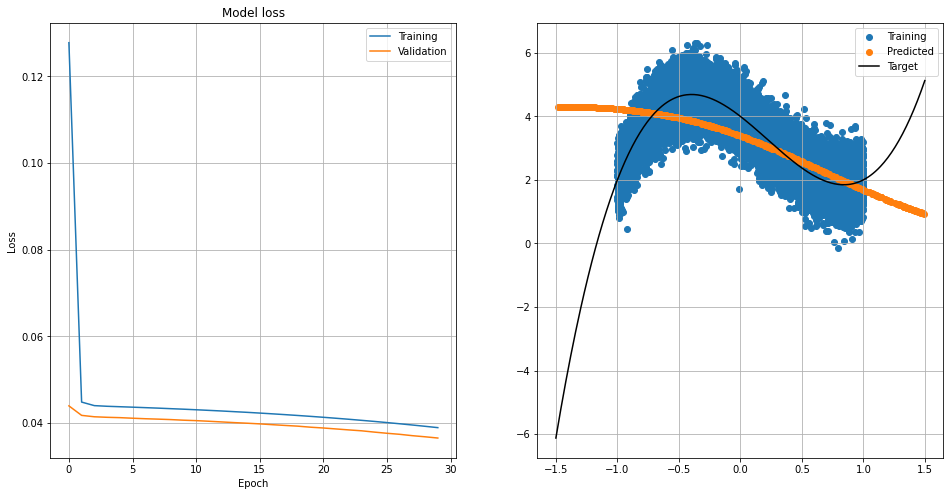

-------------------
Loss function:  mean_absolute_percentage_error
Loss: training data -> 15.373830795288086
Loss: validation data ->  15.34742259979248
16/16 [==============================] - 0s 6ms/step


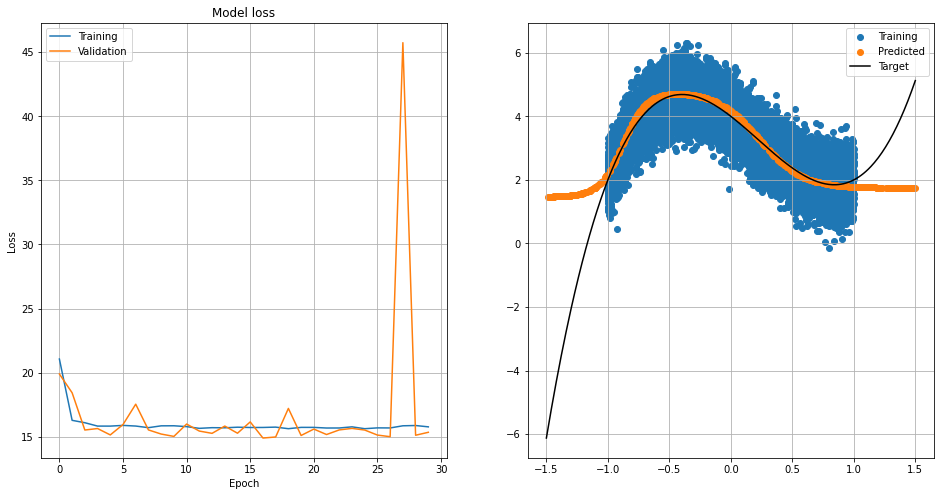

-------------------
Loss function:  mean_absolute_error
Loss: training data -> 0.4053100347518921
Loss: validation data ->  0.40251031517982483
16/16 [==============================] - 0s 3ms/step


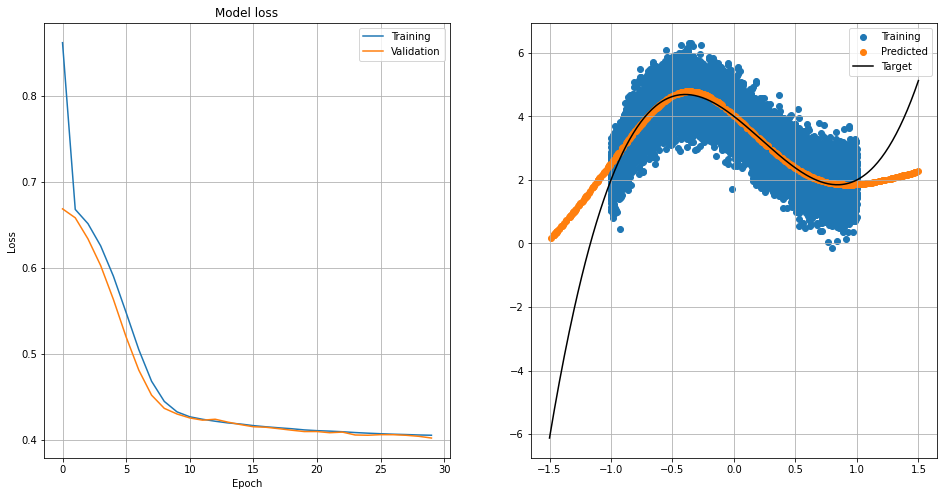

-------------------


In [101]:
for loss in ['mean_squared_logarithmic_error','mean_absolute_percentage_error','mean_absolute_error']:
    print("Loss function: ", loss)
        
    model=compile_model([45],'tanh',loss,'sgd')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,
              validation_data=(x_valid, y_valid))
    test_model(model)
    show_results(model,history)
    print("-------------------")

The small value of mean squared logarithmic error and the bad prediction suggest that we may be in an overfitting case. Overall, the best loss function seems to be mse.

In the end, we try some optimizers.

Optimizer:  adadelta
Loss: training data -> 3.5883114337921143
Loss: validation data ->  3.656114101409912
16/16 [==============================] - 0s 3ms/step


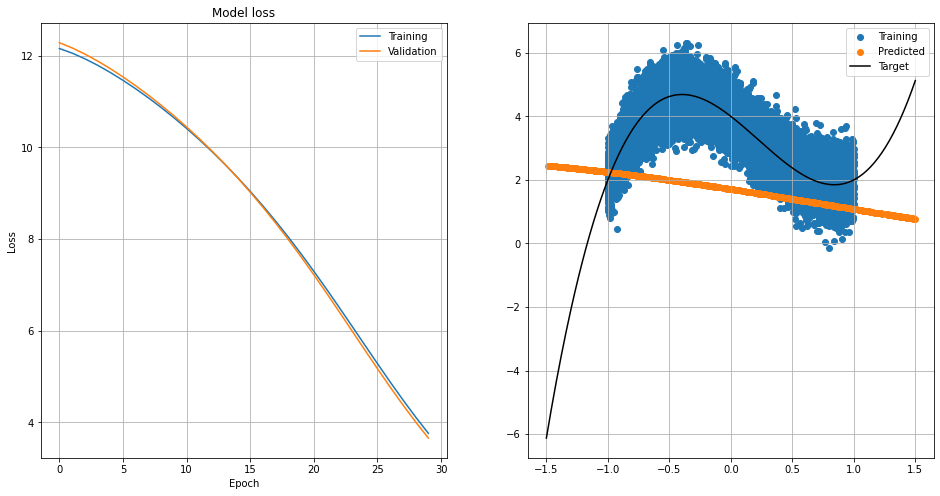

-------------------
Optimizer:  adam
Loss: training data -> 0.25462859869003296
Loss: validation data ->  0.2516840100288391
16/16 [==============================] - 0s 3ms/step


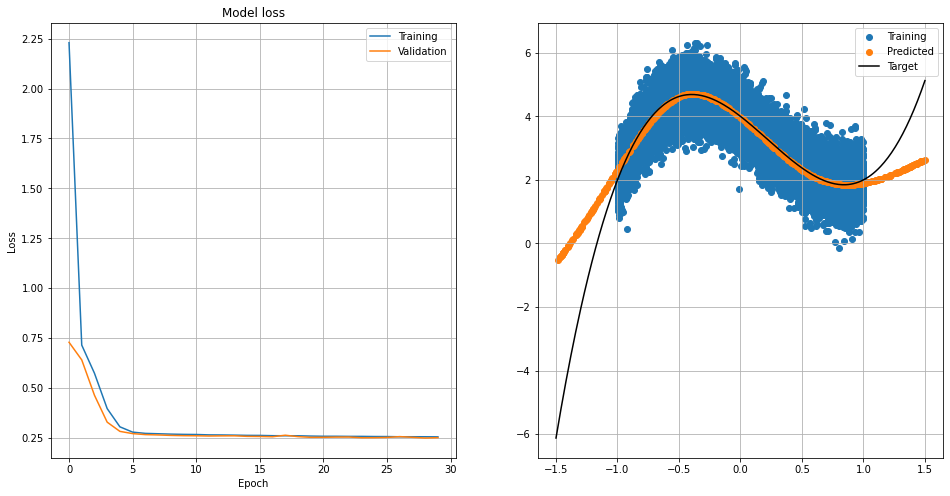

-------------------
Optimizer:  RMSprop
Loss: training data -> 0.26212117075920105
Loss: validation data ->  0.25584426522254944
16/16 [==============================] - 0s 4ms/step


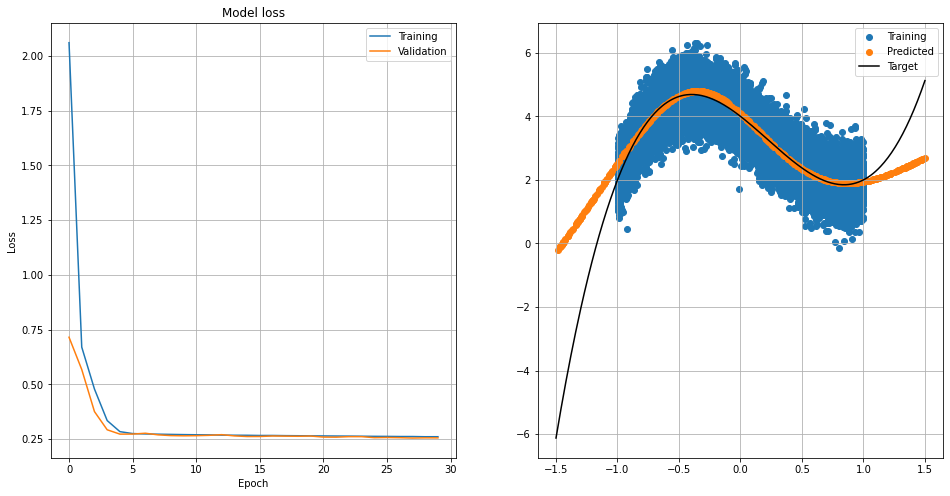

-------------------


In [104]:
for opt in ['adadelta','adam','RMSprop']:
    print("Optimizer: ", opt)
        
    model=compile_model([45],'tanh','mse',opt)
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              shuffle=True,
              validation_data=(x_valid, y_valid))
    test_model(model)
    show_results(model,history)
    print("-------------------")

While adadelta clearly is not suited for our pourpose, the other two seems to bring no benefits, yet they performed good. We decided to keep the SGD.

To sum up:
We found that a good combination of parameters to fit our cubic polynomial could be having only one layer of 45 neurons with hyperbolic tangent as activation function. We use MSE and SGD as loss function and optimizer. Even for this combination, results fitted outside of the training interval have almost no meaning.

FACCIO TEST CON CUTRVA ESATTA ANCHE